In [2]:
# Data Science
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

# Visualización
import matplotlib.pyplot as plt
plt.style.use("ggplot")


# PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

dev = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
dev

device(type='cuda', index=0)

# Lectura

In [4]:
df = pd.read_csv("../Datos/trimestrales-pib.csv", index_col=[0,1])
df

Impuestos sobre los productos, netos  Agricultura  \
Año  Trimestre                                                      
1993 T1                                     388594.0     216828.0   
     T2                                     388084.0     209611.0   
     T3                                     379390.0     179794.0   
     T4                                     422664.0     245272.0   
1994 T1                                     409250.0     212307.0   
...                                              ...          ...   
2019 T3                                     822448.0     269969.0   
     T4                                     849938.0     454425.0   
2020 T1                                     774944.0     355884.0   
     T2                                     627575.0     388108.0   
     T3                                     713290.0     305998.0   

                Cría y explotación de animales  Aprovechamiento forestal  \
Año  Trimestre                                                             
1993 T1                               111883.0                   17803.0   
     T2                               126136.0                   17044.0   
     T3                               146416.0                   16858.0   
     T4                               133375.0                   16537.0   
1994 T1                               110839.0                   16421.0   
...                                        ...                       ...   
2019 T3                               187821.0                   19273.0   
     T4                               196956.0                   20543.0   
2020 T1                               174004.0                   18816.0   
     T2                               180821.0                   15257.0   
     T3                               193131.0                   17010.0   

                Pesca, caza y captura  \
Año  Trimestre                          
1993 T1                        9059.0   
     T2                       10803.0   
     T3                        8911.0   
     T4                       10099.0   
1994 T1                        9077.0   
...                               ...   
2019 T3                       15774.0   
     T4                       17219.0   
2020 T1                       12756.0   
     T2                       14752.0   
     T3                       14996.0   

                Servicios relacionados con las actividades agropecuarias y forestales  \
Año  Trimestre                                                                          
1993 T1                                                     649.0                       
     T2                                                     498.0                       
     T3                                                     582.0                       
     T4                                                     730.0                       
1994 T1                                                     890.0                       
...                                                           ...                       
2019 T3                                                    1439.0                       
     T4                                                    4584.0                       
2020 T1                                                    1653.0                       
     T2                                                    1214.0                       
     T3                                                    1056.0                       

                Extracción de petróleo y gas  \
Año  Trimestre                                 
1993 T1                             865047.0   
     T2                             895218.0   
     T3                             901125.0   
     T4                             923834.0   
1994 T1                             895605.0   
...                                      ...   
2019 T3                             607141.0   
     

In [5]:
totales = df.sum(axis=1)
totales

Año   Trimestre
1993  T1           10008894.0
      T2           10171035.0
      T3           10066263.0
      T4           10416101.0
1994  T1           10343396.0
                      ...    
2019  T3           18398053.0
      T4           18869807.0
2020  T1           18023219.0
      T2           15042859.0
      T3           16822015.0
Length: 111, dtype: float64

In [19]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
min_max_scaler = MinMaxScaler()
min_max_data = pd.DataFrame(min_max_scaler.fit_transform(df), columns = df.columns)
min_max_data.set_index(df.index, inplace = True)
min_max_data.describe()

,"Impuestos sobre los productos, netos",Agricultura,Cría y explotación de animales,Aprovechamiento forestal,"Pesca, caza y captura",Servicios relacionados con las actividades agropecuarias y forestales,Extracción de petróleo y gas,"Minería de minerales metálicos y no metálicos, excepto petróleo y gas",Servicios relacionados con la minería,"Generación, transmisión y distribución de energía eléctrica",...,Hospitales,Residencias de asistencia social y para el cuidado de la salud. Otros servicios de asistencia social,"Servicios artísticos, culturales y deportivos, y otros servicios relacionados","Museos, sitios históricos, zoológicos y similares. Servicios de entretenimiento en instalaciones recreativas y otros servicios recreativos",Servicios de alojamiento temporal,Servicios de preparación de alimentos y bebidas,Servicios de reparación y mantenimiento,Servicios personales,Asociaciones y organizaciones. Hogares con empleados domésticos,"Actividades legislativas, gubernamentales, de impartición de justicia y de organismos internacionales y extraterritoriales"
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,...,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,0.429995,0.403813,0.499442,0.438132,0.306474,0.191867,0.609677,0.446877,0.417213,0.423630,...,0.517649,0.789761,0.467739,0.740292,0.591283,0.577778,0.501633,0.498370,0.434471,0.339474
std,0.261000,0.222693,0.242757,0.220269,0.204249,0.167481,0.269923,0.323961,0.252439,0.300535,...,0.228733,0.134718,0.201530,0.122971,0.199023,0.146518,0.236825,0.281583,0.282604,0.287762
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.232361,0.251526,0.300635,0.253386,0.164960,0.116292,0.512786,0.184286,0.207868,0.143718,...,0.375634,0.736573,0.317008,0.699425,0.444643,0.476422,0.328262,0.246003,0.205355,0.086605
50%,0.407233,0.360148,0.513869,0.430736,0.268184,0.151986,0.597200,0.362309,0.424049,0.446086,...,0.588732,0.801763,0.444661,0.744239,0.537521,0.575975,0.573759,0.502995,0.445280,0.208230
75%,0.571433,0.540305,0.695309,0.592799,0.402617,0.209269,0.832074,0.799800,0.598721,0.689178,...,0.696204,0.852511,0.612391,0.790015,0.703859,0.666654,0.680294,0.720216,0.699648,0.606466
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
st_scaler = StandardScaler()
st_data = pd.DataFrame(st_scaler.fit_transform(df), columns = df.columns)
st_data.set_index(df.index, inplace = True)
st_data.describe()

,"Impuestos sobre los productos, netos",Agricultura,Cría y explotación de animales,Aprovechamiento forestal,"Pesca, caza y captura",Servicios relacionados con las actividades agropecuarias y forestales,Extracción de petróleo y gas,"Minería de minerales metálicos y no metálicos, excepto petróleo y gas",Servicios relacionados con la minería,"Generación, transmisión y distribución de energía eléctrica",...,Hospitales,Residencias de asistencia social y para el cuidado de la salud. Otros servicios de asistencia social,"Servicios artísticos, culturales y deportivos, y otros servicios relacionados","Museos, sitios históricos, zoológicos y similares. Servicios de entretenimiento en instalaciones recreativas y otros servicios recreativos",Servicios de alojamiento temporal,Servicios de preparación de alimentos y bebidas,Servicios de reparación y mantenimiento,Servicios personales,Asociaciones y organizaciones. Hogares con empleados domésticos,"Actividades legislativas, gubernamentales, de impartición de justicia y de organismos internacionales y extraterritoriales"
count,1.110000e+02,1.110000e+02,1.110000e+02,1.110000e+02,1.110000e+02,1.110000e+02,1.110000e+02,1.110000e+02,1.110000e+02,1.110000e+02,...,1.110000e+02,1.110000e+02,1.110000e+02,1.110000e+02,1.110000e+02,1.110000e+02,1.110000e+02,1.110000e+02,1.110000e+02,1.110000e+02
mean,2.000402e-16,7.451497e-17,2.720547e-16,-8.941796e-16,-8.001607e-18,1.310263e-16,2.480498e-16,-1.740350e-16,1.210243e-16,6.401286e-17,...,4.160836e-16,3.840772e-16,4.400884e-17,-3.440691e-16,2.240450e-16,-5.641133e-16,-5.496104e-16,-1.155857e-16,-1.540309e-16,-4.460896e-16
std,1.004535e+00,1.004535e+00,1.004535e+00,1.004535e+00,1.004535e+00,1.004535e+00,1.004535e+00,1.004535e+00,1.004535e+00,1.004535e+00,...,1.004535e+00,1.004535e+00,1.004535e+00,1.004535e+00,1.004535e+00,1.004535e+00,1.004535e+00,1.004535e+00,1.004535e+00,1.004535e+00
min,-1.654963e+00,-1.821546e+00,-2.066701e+00,-1.998097e+00,-1.507299e+00,-1.150801e+00,-2.268953e+00,-1.385673e+00,-1.660226e+00,-1.415981e+00,...,-2.273375e+00,-5.888915e+00,-2.331466e+00,-6.047336e+00,-2.984402e+00,-3.961276e+00,-2.127762e+00,-1.777917e+00,-1.544355e+00,-1.185053e+00
25%,-7.606547e-01,-6.869460e-01,-8.226652e-01,-8.425332e-01,-6.959935e-01,-4.532900e-01,-3.605830e-01,-8.142400e-01,-8.330510e-01,-9.356046e-01,...,-6.236890e-01,-3.965985e-01,-7.513246e-01,-3.338399e-01,-7.401383e-01,-6.949008e-01,-7.353843e-01,-9.003096e-01,-8.144082e-01,-8.827264e-01
50%,-8.760607e-02,-1.969677e-01,5.969833e-02,-3.373009e-02,-1.883216e-01,-2.392024e-01,-4.643396e-02,-2.622255e-01,2.720163e-02,7.505767e-02,...,3.121793e-01,8.949316e-02,-1.150331e-01,3.224089e-02,-2.713524e-01,-1.236218e-02,3.059358e-01,1.650026e-02,3.842335e-02,-4.581531e-01
75%,5.443655e-01,6.156948e-01,8.105022e-01,7.053539e-01,4.728455e-01,1.043737e-01,8.276659e-01,1.094345e+00,7.222784e-01,8.875909e-01,...,7.841666e-01,4.679008e-01,7.210252e-01,4.061793e-01,5.682096e-01,6.093388e-01,7.578204e-01,7.914270e-01,9.425901e-01,9.320311e-01
max,2.193834e+00,2.689315e+00,2.071321e+00,2.562390e+00,3.410889e+00,4.847104e+00,1.452616e+00,1.715122e+00,2.319095e+00,1.926512e+00,...,2.118359e+00,1.567661e+00,2.653082e+00,2.121512e+00,2.062932e+00,2.894774e+00,2.113907e+00,1.789545e+00,2.010210e+00,2.305799e+00


In [25]:
min_max_data.to_csv("../Datos/min_max_df.csv")
st_data.to_csv("../Datos/st_df.csv")

# División de datos

In [6]:
def dividir_series(serie_x, serie_y, test_size):
    n_obs = serie_x.shape[0]
    n = int(n_obs*(1-test_size))
    return serie_x[:n], serie_x[n:], serie_y[:n], serie_y[n:]

In [57]:
X_train, X_test, y_train, y_test = dividir_series(df.values, totales.values, 0.1)

In [80]:
X_train, X_test, y_train, y_test = dividir_series(min_max_data.values, totales.values, 0.1)

In [44]:
X_train, X_test, y_train, y_test = dividir_series(st_data.values, totales.values, 0.1)

# Reducción

In [81]:
n_components = 4
pca = PCA(n_components=n_components)
X_train_r = pca.fit_transform(X_train)
X_test_r = pca.transform(X_test)
X_train_r.shape, X_test_r.shape

((99, 4), (12, 4))

# Preparación

In [82]:
def preparar_entrada(X, y, k):
    end = X.shape[0] - k + 1
    Xl = []
    yl = []
    for i in range(end-1):
        Xt = X[i:i+k,:]
        yt = y[i+k]
        Xl.append(Xt.ravel())
        yl.append(yt)
    
    X_new = torch.Tensor(Xl).to(dev)
    y_new = torch.Tensor(yl).to(dev)
    return X_new, y_new

In [83]:
t_ventana = 10
X_train_t, y_train_t = preparar_entrada(X_train_r, y_train, t_ventana)
X_test_t, y_test_t = preparar_entrada(X_test_r, y_test, t_ventana)

In [84]:
X_train.shape

(99, 135)

In [85]:
X_train_t.shape

torch.Size([89, 40])

In [86]:
X_test_t.shape

torch.Size([2, 40])

In [87]:
def calcular_r2(y_pred, y_true):
    ss_res = ((y_true - y_pred)**2).sum()
    y_mean = y_true.mean()
    ss_total = ((y_true - y_mean)**2).sum()
    
    return 1 - (ss_res/ss_total)

# Regresión lineal

In [88]:
X_train_t

tensor([[-3.1064, -1.3273, -0.1257,  ..., -1.6890, -0.1193,  0.2281],
        [-3.1522, -1.3470,  0.0214,  ..., -1.4555,  0.0910, -0.4608],
        [-3.1453, -1.1946,  0.0362,  ..., -1.1331,  0.2451, -0.6740],
        ...,
        [ 2.6536, -0.4213,  0.2929,  ..., -0.3162,  1.2205, -0.3200],
        [ 2.7756, -0.3957,  0.4419,  ..., -0.4713,  1.0319,  0.4908],
        [ 2.6776, -0.6501,  0.6041,  ..., -0.4202,  1.1421,  0.0417]],
       device='cuda:0')

# Modelo perceptron

In [89]:
class Perceptron(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        t_ventana, n_vars = input_dim
        self.entrada = nn.Linear(t_ventana*n_vars, 1)
        
    def forward(self, x):
        x = self.entrada(x)
        return x.flatten()

Inicia entrenamiento
Termina el entrenamiento
CPU times: user 32.9 s, sys: 862 ms, total: 33.8 s
Wall time: 34.1 s


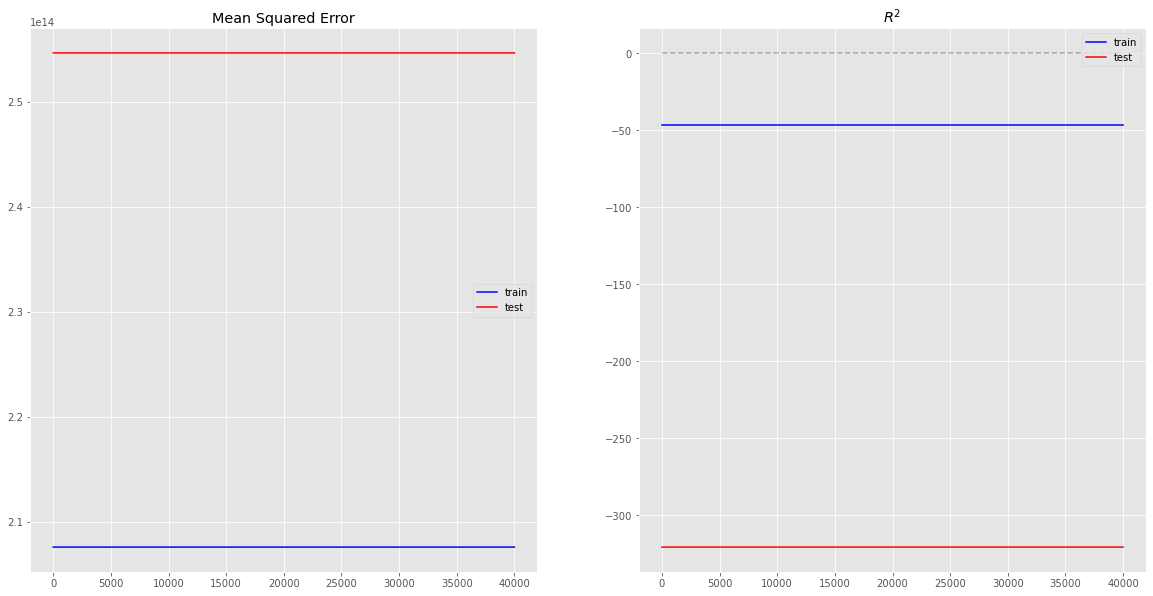

In [90]:
%%time

input_dim = (t_ventana, n_components)

perceptron = Perceptron(input_dim)
perceptron.to(dev)

loss_function = nn.MSELoss()
optimizer = optim.Adagrad(perceptron.parameters())

epochs = 40000
mse_train = []
mse_test = []

r2_train = []
r2_test = []

print("Inicia entrenamiento")
for epoch in range(epochs):
    
    perceptron.zero_grad()
    # Training
    y_pred = perceptron(X_train_t).to(dev)
        
    loss = loss_function(y_pred, y_train_t)
    
    mse_train.append(loss)
    r2_train.append( calcular_r2(y_pred, y_train_t ) )
    
    loss.backward()
    optimizer.step()
    
    # Validation
    y_pred = perceptron(X_test_t).to(dev)
    loss = loss_function(y_pred, y_test_t)
    mse_test.append(loss)
    r2_test.append( calcular_r2(y_pred, y_test_t ) )

print("Termina el entrenamiento")

fig, ax = plt.subplots(ncols=2, figsize=(20,10))
ax[0].plot(mse_train, label="train", color="blue")
ax[0].plot(mse_test, label="test", color="red")
ax[0].set_title("Mean Squared Error")
ax[0].legend()


ax[1].plot(r2_train, label="train", color="blue")
ax[1].plot(r2_test, label="test", color="red")
ax[1].set_title("$R^2$")
#ax[1].set_ylim(0,1)
ax[1].hlines(0, xmin=0, xmax=epochs, ls="--", alpha=0.3, color="black")
ax[1].legend()

# Modelo MLP

In [91]:
class MLP(nn.Module):
    def __init__(self, input_dim, hidden_units):
        super().__init__()
        t_ventana, n_vars = input_dim
        self.entrada = nn.Linear(t_ventana*n_vars, hidden_units)
        self.relu = nn.ReLU()
        self.salida = nn.Linear(hidden_units, 1)
        
    def forward(self, x):
        x = self.relu(self.entrada(x ))
        x = self.salida(x)
        return x.flatten()

Inicia
Termina el entrenamiento
CPU times: user 381 ms, sys: 3.52 ms, total: 385 ms
Wall time: 384 ms


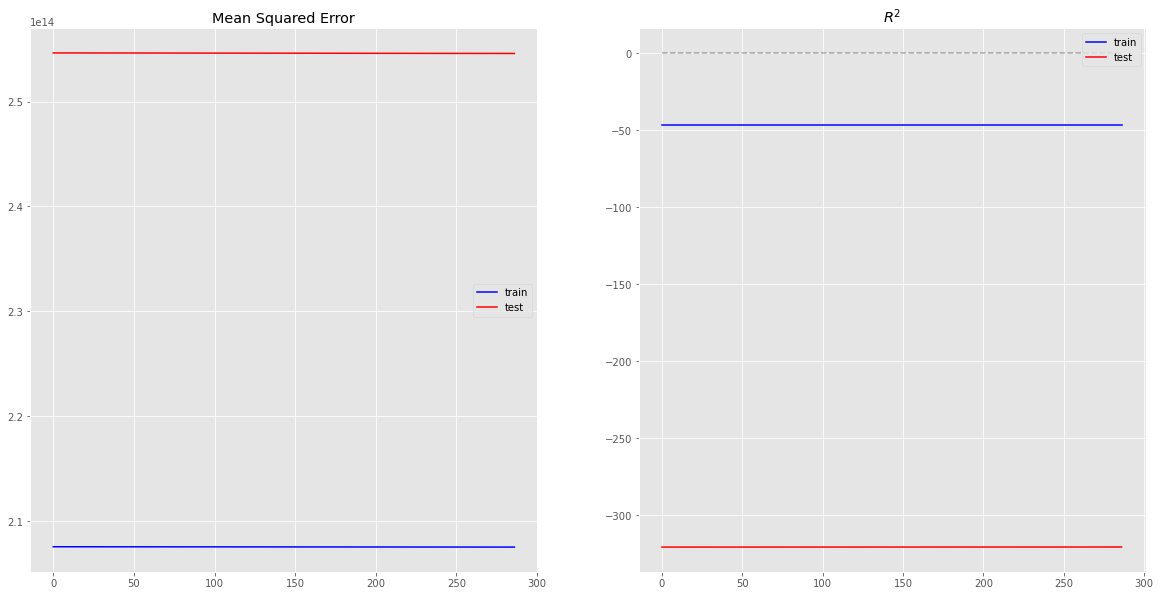

In [92]:
%%time
hidden_units = 512

input_dim = (t_ventana, n_components)

red = MLP(input_dim, hidden_units)
red.to(dev)

loss_function = nn.MSELoss()
optimizer = optim.Adagrad(red.parameters())

epochs = 287
mse_train = []
mse_test = []

r2_train = []
r2_test = []

print("Inicia")
for epoch in range(epochs):
    
    red.zero_grad()
    y_pred = red(X_train_t).to(dev)
    
    loss = loss_function(y_pred, y_train_t)
    mse_train.append(loss)
    r2_train.append( calcular_r2(y_pred, y_train_t ) )
    loss.backward()
    optimizer.step()
    
    # Validate
    y_pred = red(X_test_t).to(dev)
    loss = loss_function(y_pred, y_test_t)
    mse_test.append(loss)
    r2_test.append( calcular_r2(y_pred, y_test_t ) )

print("Termina el entrenamiento")

fig, ax = plt.subplots(ncols=2, figsize=(20,10))
ax[0].plot(mse_train, label="train", color="blue")
ax[0].plot(mse_test, label="test", color="red")
ax[0].set_title("Mean Squared Error")
ax[0].legend()


ax[1].plot(r2_train, label="train", color="blue")
ax[1].plot(r2_test, label="test", color="red")
ax[1].set_title("$R^2$")
#ax[1].set_ylim(0,1)
ax[1].hlines(0, xmin=0, xmax=epochs, ls="--", alpha=0.3, color="black")
ax[1].legend()